In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import six
import pydot
import lime
import lime.lime_tabular


C:\Users\Арина\AppData\Local\Temp\ipykernel_15424\843876039.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1. Задача
Датасет с информацией о машине. Требуется предсказать стоимость машины.

# 2. EDA

Загружаем тренировычный дата сет

In [2]:
train_set = pd.read_csv('x_train.csv') 
train = train_set.copy() 

Обзор датасета, первых 10 элементов

In [3]:
train.head(10)

Unnamed: 0          Brand    Year        Model         Car/Suv  \
0           0     Mitsubishi  2003.0       Pajero             SUV   
1           1          Honda  2017.0         CR-V             SUV   
2           2          Honda  2014.0          Fit  USED Dealer ad   
3           3         Toyota  2010.0        Hiace      Commercial   
4           4  Mercedes-Benz  2015.0       CLA250           Sedan   
5           5     Volkswagen  2017.0  Transporter      Commercial   
6           6         Toyota  2012.0      Corolla       Hatchback   
7           7           Jeep  2015.0        Grand             SUV   
8           8         Suzuki  2019.0       Baleno       Hatchback   
9           9         Toyota  2008.0        Crown  USED Dealer ad   

                                         Title UsedOrNew Transmission  \
0      2003 Mitsubishi Pajero Exceed LWB (4X4)      USED    Automatic   
1                 2017 Honda CR-V VTI-LX (awd)      USED    Automatic   
2                               2014 Honda Fit      USED            -   
3                        2010 Toyota Hiace LWB      USED    Automatic   
4       2015 Mercedes-Benz CLA250 Sport 4Matic      USED    Automatic   
5  2017 Volkswagen Transporter TDI 400 SWB LOW      USED    Automatic   
6             2012 Toyota Corolla Ascent Sport      USED       Manual   
7       2015 Jeep Grand Cherokee Limited (4X4)      USED    Automatic   
8                        2019 Suzuki Baleno GL      USED    Automatic   
9                            2008 Toyota Crown      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres  \
0  4 cyl, 3.2 L       4WD    Diesel    0 L / 100 km     343128   
1  4 cyl, 1.5 L       AWD  Unleaded  7.4 L / 100 km     130813   
2             -     Other     Other               -      44248   
3    4 cyl, 3 L      Rear    Diesel    8 L / 100 km     147317   
4    4 cyl, 2 L       AWD   Premium  6.6 L / 100 km      78403   
5    4 cyl, 2 L     Front    Diesel  8.1 L / 100 km     273970   
6  4 cyl, 1.8 L     Front  Unleaded  7.3 L / 100 km     155657   
7    6 cyl, 3 L       4WD    Diesel  7.5 L / 100 km     130100   
8  4 cyl, 1.4 L     Front  Unleaded  5.4 L / 100 km      36400   
9             -     Other         -               -     109594   

             ColourExtInt              Location CylindersinEngine    BodyType  \
0  Silver / Cream Leather       Stanthorpe, QLD             4 cyl         SUV   
1            Blue / Black        Ravenhall, VIC             4 cyl         SUV   
2           Black / Black      Minchinbury, NSW                 -   Hatchback   
3           Silver / Grey         Lidcombe, NSW             4 cyl  Commercial   
4                 Red / -          Rozelle, NSW             4 cyl       Sedan   
5               White / -       Smithfield, NSW             4 cyl  Commercial   
6          Silver / Black      Minchinbury, NSW             4 cyl   Hatchback   
7               Black / -   Sunshine North, VIC             6 cyl         SUV   
8           White / Black          Geelong, VIC             4 cyl   Hatchback   
9           White / Black  Dingley Village, VIC                 -         NaN   

      Doors     Seats  Price  
0   4 Doors   7 Seats   9990  
1   4 Doors   5 Seats  34990  
2       NaN       NaN  18995  
3   4 Doors   3 Seats  25999  
4   4 Doors   5 Seats  34800  
5   2 Doors   2 Seats  23500  
6   5 Doors   5 Seats  11995  
7   4 Doors   5 Seats  29888  
8   4 Doors   5 Seats  21990  
9       NaN       NaN  21999

Узнаем информацию о данных 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13344 entries, 0 to 13343
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13344 non-null  int64  
 1   Brand              13344 non-null  object 
 2   Year               13344 non-null  float64
 3   Model              13344 non-null  object 
 4   Car/Suv            13322 non-null  object 
 5   Title              13344 non-null  object 
 6   UsedOrNew          13344 non-null  object 
 7   Transmission       13344 non-null  object 
 8   Engine             13344 non-null  object 
 9   DriveType          13344 non-null  object 
 10  FuelType           13344 non-null  object 
 11  FuelConsumption    13344 non-null  object 
 12  Kilometres         13344 non-null  object 
 13  ColourExtInt       13344 non-null  object 
 14  Location           12987 non-null  object 
 15  CylindersinEngine  13344 non-null  object 
 16  BodyType           131

Большая часть признаков строковые. Первый столбец "Unnamed: 0" видимо является индексом, его можно выкинуть. Без него признаков 18 + 1
таргет (Price). Несколько признаков имеют пропущенные значения (Location, BodyType, Doors, Seats). Taрrет + Year - числовые признаки. Год почему-
то имеет тип float

Удаление столбца "Unnamed: 0"

In [5]:
train = train.drop(columns=['Unnamed: 0'])

In [6]:
description = {
"Brand": "Name of the car manufacturer",
"Year": "Year of manufacture or release",
"Model": "Name or code of the car model",
"Car/Suv": "Type of the car (car or suv)",
"Title": "Title or description of the car",
"Used0rNew": "Condition of the car (used or new)",
"Transmission": "Type of transmission (manual or automatic)",
"Engine": "Engine capacity or power (in litres or kilowatts)",
"DriveType": "Type of drive (front-wheel, rear-wheel, or all-wheel)",
"FuelType": "Type of fuel (petrol, diesel, hybrid, or electric)",
"FuelConsumption": "Fuel consumption rate (in litres per N0 km)",
"Kilometres": "Distance travelled by the car (in kilometres)",
"ColourExtInt": "Colour of the car (exterior and interior)",
"Location": "Location of the car (city and state)",
"CylindersinEngine": "Number of cylinders in the engine",
"BodyType": "Shape or style of the car body (sedan, hatchback, coupe, etc.)",
"Doors": "Number of doors in the car",
"Seats": "Number of seats in the car",
"Price": "Price of the car (in dollars)",
}

In [7]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    train,
    minimal=True,
    variables={
        "descriptions": description
    },
    correlations={
    "auto": {"calculate": True},
    "phi_k": {"calculate": True},
    "cramers": {"calculate": True},
    },
    interactions={
    "targets": ["Price"]
    },
    html={
    "style": {"theme": "flatly"}
    },
    missing_diagrams={
    "bar": True,
    "heatmap": True
    }
)
profile.to_file("cars.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

1. Brand. Всего 75 брендов, самая популярная - toyota (17%). По таблице корреляций видно, что цена очень сильно зависит от бренда, признак наверняка крайне важный. Что логично, ведь люди зачастую покупают опираясь на известность бренда. И в принципе с брендом хорошо коррелируют практически все признаки. Видимо, каждому бренду присуще свой набор автомобильных характеристик
2. Year. Большая часть автомобилей датируется 2013-2020 годом выпуска (Q1-Q3). Автомобилей до 1990 года практически нет в датасете, исключительные моменты. Некоторые года вообще имеют только одну запись в датасете (например, 1059, 1970, 1975…). Видна корреляция между годом и ценой. Наверное, современные автомобили дорогие (если старые не являются раритетом)
3. Model. Моделей автомобилей очень много - 734
4. Car/Suv. Странный признак, несоответствующий описанию. Тут 558 значений. Судя по всему, это какие-то маркетинговые метки, характеризующие автомобиль. Тип автомобиля и так указан признаком BodyType
5. Title - больше половина значений уникальны. Просто название автомобиля, включающее в себя, зачастую, год, бренд и какие-то характеристики. 
6. UserOrNew - важный категориальный признак, влияющий на цену. Наверное новая машина стоит дороже
7. Transmission, Трансмиссия
8. Engine. Характеристика двигателя. Наверное, чем лучше двигатель, тем дороже машина. Значения представлены в формате 4 cyl, 3.2 4. Можно попробовать превратить в числовой признак (разделив количество литров на количество цистерн)
9. DriveType. В основном front (42%)
10. FuelType. Тип топлива. В основном unleaded
11. FuelConsumption. Затраты топлива на 100 км. Можно превратить в числовой признак
12. Kilometres. Километры. Это вообще числовой признак, но там есть пропущенные значения (в виде - или - / -)
13. ColourExtint. Цвет. Их много, 732
14. Location, 610 значений. Какие-то странные регионы, непонятно. Да и вряд ли локация влияет на цену, ведь обычно устанавливается одна мировая цена на автомобиль
15. CylindersinEngine. Признак категориальный, но можно преобразовать в числовой
16. BodyType. Кажется, полезный признак, говорит, какого типа автомобиль
17. Doors. Количество дверей. Сильно коррелирует с Seats и BodyType. Особенно с Seats 
18. Seats. 10% пропущенных значений

Подчистка данных

In [ ]:
# Извлечение информации о числе цилиндров и объеме двигателя
train[['Cylinders', 'EngineVolume']] = train['Engine'].str.extract(r'(\d+)\s+cyl,\s+([\d.]+)\s+L')
train['Cylinders'] = train['Cylinders'].astype(float)
train['EngineVolume'] = train['EngineVolume'].astype(float)
train = train.drop(columns=['Engine'])  # Удаляем исходный столбец 'Engine'
train = train.drop(columns=['CylindersinEngine'])  # Удаляем исходный столбец 'CylindersinEngine'

In [ ]:
# Извлечение числового значения расхода топлива
train['FuelConsumption'] = train['FuelConsumption'].str.extract(r'([\d.]+)\s+L').astype(float)

In [ ]:
# Разделение информации о местоположении на город и штат
train[['City', 'State']] = train['Location'].str.split(', ', expand=True)
train = train.drop(columns=['Location'])  # Удаляем исходный столбец 'Location'

In [ ]:
# Обработка столбцов 'Doors' и 'Seats'
train['Doors'] = train['Doors'].str.extract('(\d+)').astype(float)
train['Seats'] = train['Seats'].str.extract('(\d+)').astype(float)

In [ ]:
# Разделение информации о цвете внешней и внутренней отделки
train[['ExteriorColor', 'InteriorColor']] = train['ColourExtInt'].str.split('/', n=1, expand=True)
train = train.drop(columns=['ColourExtInt'])  # Удаляем исходный столбец 'ColourExtInt'

In [ ]:
# Удаление столбца "Title", данный стоолбец сложно будет обработать и он в основном содержит повторяющуюся в других столбцах информацию
train = train.drop(columns=['Title'])

In [ ]:
train.head(10)

Brand    Year        Model         Car/Suv UsedOrNew Transmission  \
0     Mitsubishi  2003.0       Pajero             SUV      USED    Automatic   
1          Honda  2017.0         CR-V             SUV      USED    Automatic   
2          Honda  2014.0          Fit  USED Dealer ad      USED          NaN   
3         Toyota  2010.0        Hiace      Commercial      USED    Automatic   
4  Mercedes-Benz  2015.0       CLA250           Sedan      USED    Automatic   
5     Volkswagen  2017.0  Transporter      Commercial      USED    Automatic   
6         Toyota  2012.0      Corolla       Hatchback      USED       Manual   
7           Jeep  2015.0        Grand             SUV      USED    Automatic   
8         Suzuki  2019.0       Baleno       Hatchback      USED    Automatic   
9         Toyota  2008.0        Crown  USED Dealer ad      USED    Automatic   

  DriveType  FuelType  FuelConsumption Kilometres    BodyType  Doors  Seats  \
0       4WD    Diesel              0.0     343128         SUV    4.0    7.0   
1       AWD  Unleaded              7.4     130813         SUV    4.0    5.0   
2     Other     Other              NaN      44248   Hatchback    NaN    NaN   
3      Rear    Diesel              8.0     147317  Commercial    4.0    3.0   
4       AWD   Premium              6.6      78403       Sedan    4.0    5.0   
5     Front    Diesel              8.1     273970  Commercial    2.0    2.0   
6     Front  Unleaded              7.3     155657   Hatchback    5.0    5.0   
7       4WD    Diesel              7.5     130100         SUV    4.0    5.0   
8     Front  Unleaded              5.4      36400   Hatchback    4.0    5.0   
9     Other       NaN              NaN     109594         NaN    NaN    NaN   

   Price  Cylinders  EngineVolume             City State ExteriorColor  \
0   9990        4.0           3.2       Stanthorpe   QLD       Silver    
1  34990        4.0           1.5        Ravenhall   VIC         Blue    
2  18995        NaN           NaN      Minchinbury   NSW        Black    
3  25999        4.0           3.0         Lidcombe   NSW       Silver    
4  34800        4.0           2.0          Rozelle   NSW          Red    
5  23500        4.0           2.0       Smithfield   NSW        White    
6  11995        4.0           1.8      Minchinbury   NSW       Silver    
7  29888        6.0           3.0   Sunshine North   VIC        Black    
8  21990        4.0           1.4          Geelong   VIC        White    
9  21999        NaN           NaN  Dingley Village   VIC        White    

    InteriorColor  
0   Cream Leather  
1           Black  
2           Black  
3            Grey  
4             NaN  
5             NaN  
6           Black  
7             NaN  
8           Black  
9           Black

In [ ]:
# ищем количество пропусков по признакам, заменив прочерки на нулевые значения
train.replace('-', np.nan, inplace=True)
train.replace(' -', np.nan, inplace=True)
train.replace('- ', np.nan, inplace=True)
train.replace(' - ', np.nan, inplace=True)
for col in train.columns:
    print(col, '-', train[col].isna().sum())

Brand - 0
Year - 0
Model - 0
Car/Suv - 22
UsedOrNew - 0
Transmission - 197
DriveType - 0
FuelType - 508
FuelConsumption - 1338
Kilometres - 99
BodyType - 230
Doors - 1259
Seats - 1344
Price - 0
Cylinders - 1407
EngineVolume - 1407
City - 357
State - 357
ExteriorColor - 310
InteriorColor - 6172


In [ ]:
# Удаление столбца "InteriorColor", так как там большое количество пропущенных значений
train = train.drop(columns=['InteriorColor'])

In [ ]:
# Удаление строк с пустыми значениями в "Car/Suv", так как количество строк с пропущенными значениями этого признака мало
train.dropna(axis = 'index', subset = ['Car/Suv'], inplace = True) 

In [ ]:
# Пропуски в 'Transmission' заменяем на частовстречающееся относительно моделей
train['Transmission'] = train['Transmission'].fillna(train.groupby('Model')['Transmission'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x))

In [ ]:
# Пропуски в 'FuelType' заменяем на частовстречающееся относительно моделей
train['FuelType'] = train['FuelType'].fillna(train.groupby('Model')['FuelType'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x))

In [ ]:
# Пропуски в 'FuelConsumption' заменяем на частовстречающееся относительно моделей
train['FuelConsumption'] = train['FuelConsumption'].fillna(train.groupby('Model')['FuelConsumption'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x))

In [ ]:
# Удаление неточных значений в признаке киллометры, которые не являются числами
train['Kilometres'] = pd.to_numeric(train['Kilometres'], errors='coerce').fillna(np.nan)

In [ ]:
# Пропуски в 'Kilometres' заменяем на среднее по годам
train['Kilometres'] = train['Kilometres'].fillna(train.groupby('Year')['Kilometres'].transform(lambda x: x.value_counts().idxmax()))

In [ ]:
# Пропуски в 'BodyType' заменяем на частовстречающееся по моделям
train['BodyType'] = train['BodyType'].fillna(train.groupby('Model')['BodyType'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x))

In [ ]:
# Пропуски в 'Doors' заменяем на частовстречающееся по моделям
train['Doors'] = train['Doors'].fillna(train.groupby('Model')['Doors'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x))

In [ ]:
# Пропуски в 'Seats' заменяем на частовстречающееся по моделям
train['Seats'] = train['Seats'].fillna(train.groupby('Model')['Seats'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x))

In [ ]:
# Пропуски в 'Cylinders' заменяем на частовстречающееся по моделям
train['Cylinders'] = train['Cylinders'].fillna(train.groupby('Model')['Cylinders'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x))

In [ ]:
# Пропуски в 'EngineVolume' заменяем на частовстречающееся по моделям
train['EngineVolume'] = train['EngineVolume'].fillna(train.groupby('Model')['EngineVolume'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x))

In [ ]:
# Пустые значения в столбце 'ExteriorColor'заменяем частовстречающимся по этому признаку
train['ExteriorColor'] = train['ExteriorColor'].fillna(train['ExteriorColor'].value_counts().index[0])

In [ ]:
# Пустые значения в столбце 'State' заменяем частовстречающимся по этому признаку
train['State'] = train['State'].fillna(train['State'].value_counts().index[0])

In [ ]:
# Удаление столбца "City", так как у нас есть уже информация о штатах, которую будет легче обработать
train = train.drop(columns=['City'])

In [ ]:
# проверяем остались ли нулевые значения в таблице
train.isna().sum() 

Brand                0
Year                 0
Model                0
Car/Suv              0
UsedOrNew            0
Transmission        11
DriveType            0
FuelType            33
FuelConsumption    430
Kilometres           0
BodyType            39
Doors              213
Seats              436
Price                0
Cylinders          341
EngineVolume       341
State                0
ExteriorColor        0
dtype: int64

In [ ]:
train.dtypes # узнаем информацию о типах данных 

Brand               object
Year               float64
Model               object
Car/Suv             object
UsedOrNew           object
Transmission        object
DriveType           object
FuelType            object
FuelConsumption    float64
Kilometres         float64
BodyType            object
Doors              float64
Seats              float64
Price                int64
Cylinders          float64
EngineVolume       float64
State               object
ExteriorColor       object
dtype: object

In [ ]:
# заполнение количественных пустых данных медианой
train['FuelConsumption'] = train['FuelConsumption'].fillna(train['FuelConsumption'].median())
train['Doors'] = train['Doors'].fillna(train['Doors'].median())
train['Seats'] = train['Seats'].fillna(train['Seats'].median())
train['Cylinders'] = train['Cylinders'].fillna(train['Cylinders'].median())
train['EngineVolume'] = train['EngineVolume'].fillna(train['EngineVolume'].median())

<Axes: xlabel='FuelConsumption', ylabel='Count'>

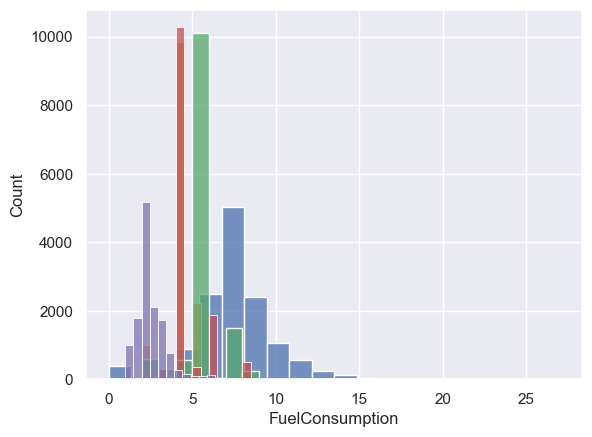

In [ ]:
sns.histplot(train['FuelConsumption'], bins = 20)
sns.histplot(train['Doors'], bins = 20)
sns.histplot(train['Seats'], bins = 20)
sns.histplot(train['Cylinders'], bins = 20)
sns.histplot(train['EngineVolume'], bins = 20)

In [ ]:
# заполнение качественных пустых данных модой
train['Transmission'] = train['Transmission'].fillna(train['Transmission'].mode()[0])
train['FuelType'] = train['FuelType'].fillna(train['FuelType'].mode()[0])
train['BodyType'] = train['BodyType'].fillna(train['BodyType'].mode()[0])

In [ ]:
# проверяем остались ли нулевые значения в таблице
train.isna().sum() 

Brand              0
Year               0
Model              0
Car/Suv            0
UsedOrNew          0
Transmission       0
DriveType          0
FuelType           0
FuelConsumption    0
Kilometres         0
BodyType           0
Doors              0
Seats              0
Price              0
Cylinders          0
EngineVolume       0
State              0
ExteriorColor      0
dtype: int64

In [ ]:
# Рассчет статистических показателей для числовых столбцов
train.describe()

Year  FuelConsumption     Kilometres         Doors   
count  13322.000000     13322.000000   13322.000000  13322.000000  \
mean    2016.214082         7.607724   97050.749437      4.017640   
std        5.201498         2.332535   78982.424847      0.730827   
min     1959.000000         0.000000       1.000000      2.000000   
25%     2013.000000         6.500000   35736.500000      4.000000   
50%     2017.000000         7.600000   82552.000000      4.000000   
75%     2020.000000         8.700000  144087.000000      4.000000   
max     2023.000000        27.000000  533849.000000     12.000000   

              Seats         Price     Cylinders  EngineVolume  
count  13322.000000  1.332200e+04  13322.000000  13322.000000  
mean       5.071386  3.730591e+04      4.448882      2.419607  
std        1.136146  3.757350e+04      1.050546      0.887348  
min        2.000000  8.800000e+01      2.000000      0.000000  
25%        5.000000  1.899900e+04      4.000000      2.000000  
50%        5.000000  2.969000e+04      4.000000      2.200000  
75%        5.000000  4.399000e+04      4.000000      2.800000  
max       22.000000  1.500000e+06     12.000000      9.800000

В среднем, автомобили из этого набора данных были произведены в 2016 году, имеют расход топлива около 7.6 литров на 100 км, пробег около 97050 км, 4 двери, 5 сидений, среднюю цену около 37305 долларов, 4 цилиндра и объем двигателя около 2.4 литра.

<Axes: >

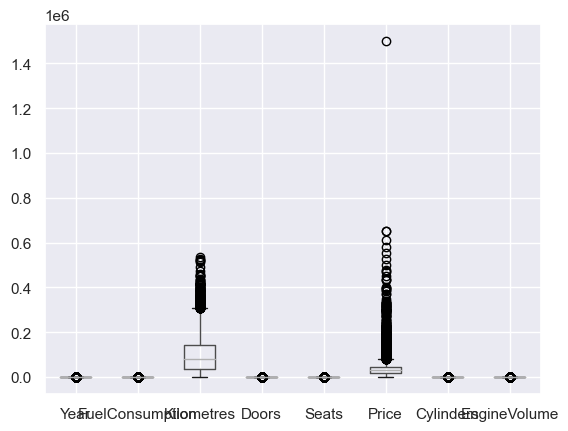

In [ ]:
# Нахождение выбросов
train.boxplot()

In [ ]:
# Бросающийся в глаза выброс по цене, являющийся явным отклонением от среднего значения
train.loc[train['Price'] > 1400000] 

Brand    Year Model                    Car/Suv UsedOrNew   
12858  Ferrari  1959.0   250  Lorbek Luxury Cars Sydney      USED  \

      Transmission DriveType  FuelType  FuelConsumption  Kilometres BodyType   
12858       Manual      Rear  Unleaded              7.6      9902.0    Coupe  \

       Doors  Seats    Price  Cylinders  EngineVolume ExteriorColor State  
12858    4.0    5.0  1500000        4.0           2.2         Blue    NSW

Это рарететная машина так как год 1959

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'FuelConsumption'}>,
        <Axes: title={'center': 'Kilometres'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'EngineVolume'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

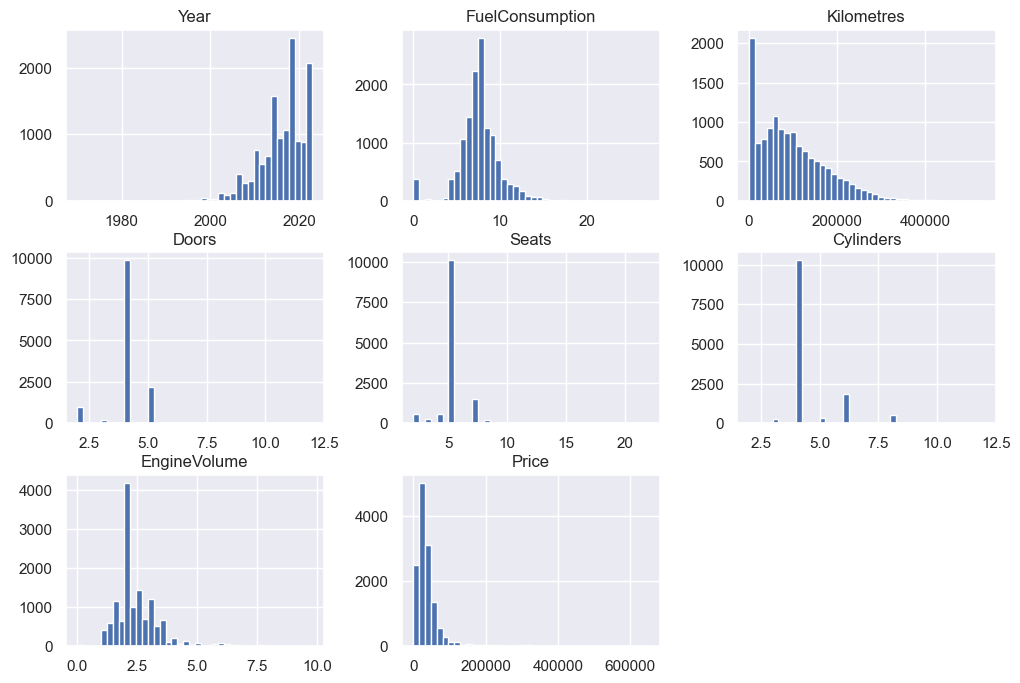

In [ ]:
# Распределение количественных данных
train[['Year', 'FuelConsumption','Kilometres', 'Doors', 'Seats', 'Cylinders', 'EngineVolume', 'Price']].hist(bins=40, figsize=(12, 8))

In [ ]:
# Уникальные значения по каждому категориальному признаку 
train['Model'].unique()

array(['Pajero', 'CR-V', 'Fit', 'Hiace', 'CLA250', 'Transporter',
       'Corolla', 'Grand', 'Baleno', 'Crown', 'Delica', 'Elgrand',
       'Camry', 'Territory', '6', 'Rover', 'Ranger', 'M2', 'Triton',
       'Tarago', 'GLC250', 'Commodore', 'Carnival', 'Midget', 'Yaris',
       'Santa', 'Estima', 'Caravelle', 'Equinox', 'Tiguan', 'Superb',
       'Xc', 'BT-50', 'Dualis', 'Kluger', 'ASX', 'Navara', 'X-Trail',
       'Golf', 'UTE', 'Fiesta', 'D-MAX', 'LX570', 'Clubsport', 'CX-3',
       'Cerato', 'XV', 'C-HR', 'CX-9', 'RAV4', '330I', 'IX35', 'Colorado',
       'Senator', 'XC60', 'Outlander', 'I30', 'Wrangler', '118D',
       'Mondeo', 'A45', 'CLS250', '4008', 'WRX', 'Calais', 'Lancer',
       'RX300', 'Stonic', 'Tucson', 'Z4', 'Accord', 'Hilux', 'Sportage',
       'IS200T', 'Trafic', 'Polo', '3', 'RIO', 'Koleos', 'GLC', 'Land',
       'Outback', 'Pathfinder', 'Kuga', 'Landcruiser', 'Iload', 'CX-5',
       'Kodiaq', 'Q3', 'Carry', 'E220', 'Kona', 'Mustang', 'Odyssey',
       'Picanto', '

In [ ]:
train['Brand'].unique()

array(['Mitsubishi', 'Honda', 'Toyota', 'Mercedes-Benz', 'Volkswagen',
       'Jeep', 'Suzuki', 'Kia', 'Nissan', 'Ford', 'Mazda', 'Land', 'BMW',
       'Holden', 'Daihatsu', 'Hyundai', 'Skoda', 'Volvo', 'Isuzu',
       'Lexus', 'HSV', 'Subaru', 'Peugeot', 'Renault', 'GWM', 'Audi',
       'MG', 'Bentley', 'Chevrolet', 'Infiniti', 'Maserati', 'Rover',
       'LDV', 'Porsche', 'Mini', 'Chrysler', 'Dodge', 'Aston',
       'Ssangyong', 'Iveco', 'Chery', 'Fiat', 'Alfa', 'Saab', 'Jaguar',
       'Citroen', 'Genesis', 'Ram', 'Mahindra', 'Ferrari', 'Daewoo',
       'Hino', 'Great', 'Ineos', 'Opel', 'Haval', 'Tata', 'Cupra',
       'McLaren', 'Tesla', 'Caterham', 'Abarth', 'Lamborghini', 'Proton',
       'FPV', 'Lotus', 'Foton', 'Polestar', 'Rolls-Royce', 'BYD', 'Geely',
       'Smart', 'Datsun', 'Hummer', 'International'], dtype=object)

In [ ]:
train['Car/Suv'].unique()

array(['SUV', 'USED Dealer ad', 'Commercial', 'Sedan', 'Hatchback',
       'Wagon', 'Custom Coaster Conversions', 'Don Frost Car Sales',
       'Ute / Tray', 'Coupe', 'Edward Lees Imports',
       'Sydney City Traders', 'NEW In stock', 'Blackburn Nissan Used',
       'Alphamotive', 'NEW Available to order', 'Redland Mazda New',
       'Jeff Wignall Ford - Frankston', 'Convertible',
       'Adelaide City Jeep', '4x4 Mega Centre', 'Dominelli GWM',
       'Alto Skoda Artarmon New Cars', 'Japanese Direct Motors',
       'Melville Volkswagen', '03 **** ****\n', '02 **** ****\n',
       'Prime Wheels.', 'Norris Motor Group Volkswagen',
       'Kloster BMW and MINI Garage - used',
       'Gold Coast Chrysler Jeep Dodge NEW Frizelle Sunshine Automotive',
       'Rockdale Mazda New', 'Liverpool Mazda New Cars', 'Mr Car',
       'Sci-Fleet Indooroopilly', 'Autoproject', 'Exclusive Autohaus',
       '08 **** ****\n', 'Coast 2 Coast Vehicles Pty Ltd',
       'Melbourne Automobiles Pty Ltd', 'Sprin

In [ ]:
train['UsedOrNew'].unique()

array(['USED', 'NEW', 'DEMO'], dtype=object)

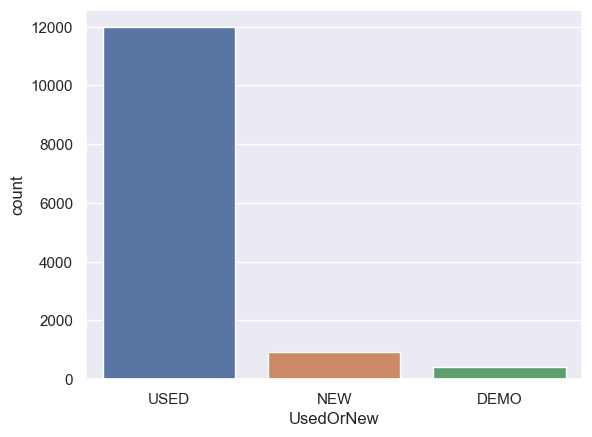

In [ ]:
# количество использованных автомобилей во много раз больше, чем новых и витринных
sns.countplot(x = 'UsedOrNew', data = train);

In [ ]:
train['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

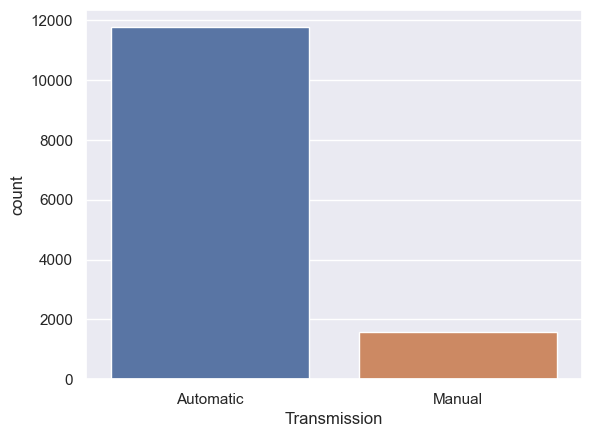

In [ ]:
# количество автомобилей с автоматической коробкой передач во много раз больше, чем с обычной
sns.countplot(x = 'Transmission', data = train);

In [ ]:
train['DriveType'].unique()

array(['4WD', 'AWD', 'Other', 'Rear', 'Front'], dtype=object)

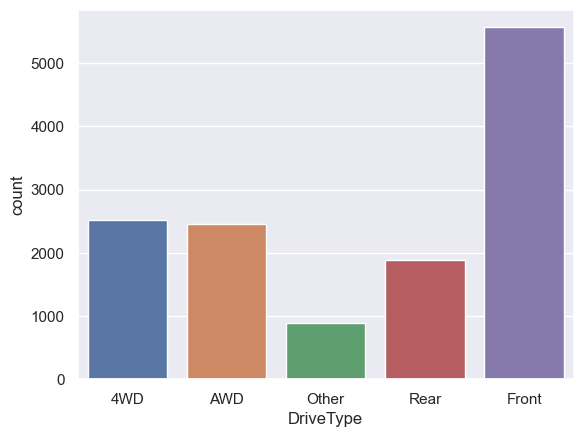

In [ ]:
sns.countplot(x = 'DriveType', data = train);

In [ ]:
train['FuelType'].unique()

array(['Diesel', 'Unleaded', 'Other', 'Premium', 'Hybrid', 'Electric',
       'LPG', 'Leaded'], dtype=object)

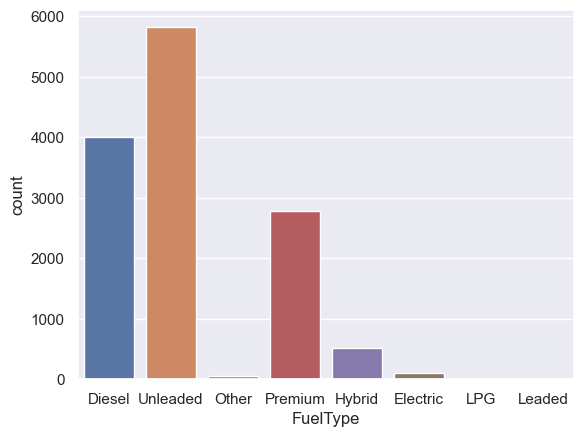

In [ ]:
sns.countplot(x = 'FuelType', data = train)

In [ ]:
train['BodyType'].unique()

array(['SUV', 'Hatchback', 'Commercial', 'Sedan', 'Wagon', 'Ute / Tray',
       'Coupe', 'Convertible', 'People Mover', 'Other'], dtype=object)

In [ ]:
sns.countplot( data = train, x = 'BodyType')

<Axes: xlabel='BodyType', ylabel='count'>

In [ ]:
train['ExteriorColor'].unique()

array(['Silver ', 'Blue ', 'Black ', 'Red ', 'White ', 'Grey ', 'Green ',
       '6 years ', '5 years ', 'Brown ', 'Gold ', 'Purple ', '3 years ',
       'Beige ', 'Orange ', 'Yellow ', 'Turquoise ', 'Burgundy ',
       '2 years ', '7 years ', 'Pink ', '1 years ', '4 years ', 'Bronze ',
       'Cream ', 'Other '], dtype=object)

In [ ]:
train['ExteriorColor'] = train['ExteriorColor'].str.replace(' ', '')

In [ ]:
# Заменяеем несоответствущие цвета на other
train['ExteriorColor'] = train['ExteriorColor'].apply(lambda x: x if x in ['Silver', 'Blue', 'Black', 'Red', 'White', 'Grey', 'Green', 'Brown', 'Gold', 'Purple', 'Beige', 'Orange', 'Yellow', 'Turquoise', 'Burgundy', 'Pink', 'Bronze', 'Cream', 'Other'] else 'Other')

In [ ]:
train['ExteriorColor'].unique()

array(['Silver', 'Blue', 'Black', 'Red', 'White', 'Grey', 'Green',
       'Other', 'Brown', 'Gold', 'Purple', 'Beige', 'Orange', 'Yellow',
       'Turquoise', 'Burgundy', 'Pink', 'Bronze', 'Cream'], dtype=object)

In [ ]:
train['State'].unique()

array(['QLD', 'VIC', 'NSW', 'ACT', 'SA', 'WA', 'NT', 'TAS', 'AU-VIC'],
      dtype=object)

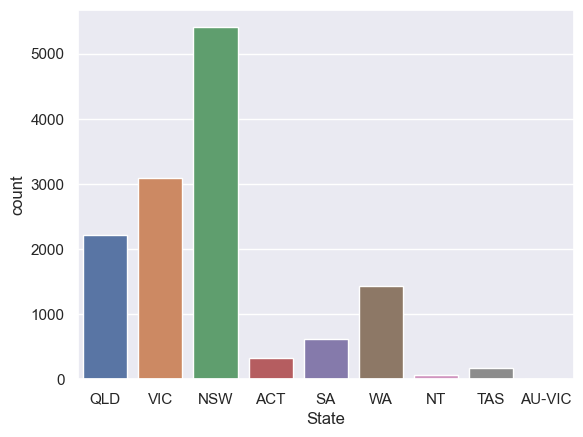

In [ ]:
sns.countplot(x = 'State', data = train);

In [ ]:
# корелляция между ценой и количественными признаками
for col in train.columns:
    if col in ['Year', 'FuelConsumption', 'Kilometres', 'Doors', 'Seats', 'Cylinders', 'Cylinders', 'EngineVolume']:
        print(col, '-', train['Price'].corr(train[col]))

Year - 0.3983541673807594
FuelConsumption - 0.1553443694311103
Kilometres - -0.4116450657341792
Doors - -0.19189994713529962
Seats - -0.050119855355841236
Cylinders - 0.3767732591564045
EngineVolume - 0.3110852526573507


In [ ]:
# Удаление столбца "Seats", так как это информация не очень влияет на цену
train = train.drop(columns=['Seats'])

In [ ]:
# Удаление столбца "FuelConsumption ", так как это информация не очень влияет на цену
train = train.drop(columns=['FuelConsumption'])

In [ ]:
# Преобразую категориальные порядковыt признаки Ordinal Encoding.
ordinalencoder = OrdinalEncoder(categories = [['USED', 'DEMO', 'NEW']])
train.loc[:, 'UsedOrNew'] = ordinalencoder.fit_transform(train.loc[:, 'UsedOrNew'].to_frame())

In [ ]:
ordinalencoder = OrdinalEncoder(categories = [['Manual', 'Automatic']])
train.loc[:, 'Transmission'] = ordinalencoder.fit_transform(train.loc[:, 'Transmission'].to_frame())

In [ ]:
# Признаки DriveType, FuelType, BodyType, State закодируем one-hot encoding, так как они содержат не слишком много значений
def dum(data, column):
    df = pd.get_dummies(data[column], prefix=column, drop_first=True)
    data = data.drop(column, axis=1)
    return data.join(df)
train = dum(train, 'DriveType')
train = dum(train, 'FuelType')
train = dum(train, 'BodyType')
train = dum(train, 'ExteriorColor')
train = dum(train, 'State')

In [ ]:
# Признак Model закодируем Binary Encoding, так как они содержат большое количество уникальных значений
encoder = ce.BinaryEncoder(cols=['Brand'], return_df=True)
train = encoder.fit_transform(train)

In [ ]:
encoder = ce.BinaryEncoder(cols=['Model'], return_df=True)
train = encoder.fit_transform(train)

In [ ]:
# Удаление столбца "Car/Suv	", так как у нас есть информация о бренде автомобиля
train = train.drop(columns=['Car/Suv'])

In [ ]:
train # обзор датасета

Brand_0  Brand_1  Brand_2  Brand_3  Brand_4  Brand_5  Brand_6    Year   
0            0        0        0        0        0        0        1  2003.0  \
1            0        0        0        0        0        1        0  2017.0   
2            0        0        0        0        0        1        0  2014.0   
3            0        0        0        0        0        1        1  2010.0   
4            0        0        0        0        1        0        0  2015.0   
...        ...      ...      ...      ...      ...      ...      ...     ...   
13339        0        0        0        1        0        1        0  2023.0   
13340        0        0        1        0        1        1        0  2016.0   
13341        0        0        0        1        1        1        1  1990.0   
13342        0        0        0        0        1        0        0  2016.0   
13343        0        0        0        1        0        0        0  2017.0   

       Model_0  Model_1  ...  ExteriorColor_White  ExteriorColor_Yellow   
0            0        0  ...                False                 False  \
1            0        0  ...                False                 False   
2            0        0  ...                False                 False   
3            0        0  ...                False                 False   
4            0        0  ...                False                 False   
...        ...      ...  ...                  ...                   ...   
13339        0        0  ...                False                 False   
13340        0        0  ...                 True                 False   
13341        0        0  ...                False                 False   
13342        1        0  ...                False                 False   
13343        0        0  ...                 True                 False   

       State_AU-VIC  State_NSW  State_NT  State_QLD  State_SA  State_TAS   
0             False      False     False       True     False      False  \
1             False      False     False      False     False      False   
2             False       True     False      False     False      False   
3             False       True     False      False     False      False   
4             False       True     False      False     False      False   
...             ...        ...       ...        ...       ...        ...   
13339         False      False     False       True     False      False   
13340         False      False     False      False     False      False   
13341         False       True     False      False     False      False   
13342         False      False     False      False      True      False   
13343         False      False     False      False     False      False   

      State_VIC State_WA  
0         False    False  
1          True    False  
2         False    False  
3         False    False  
4         False    False  
...         ...      ...  
13339     False    False  
13340     False     True  
13341     False    False  
13342     False    False  
13343     False     True  

[13321 rows x 71 columns]

In [ ]:
train.dtypes # узнаем информацию о типах данных 

Brand_0      int64
Brand_1      int64
Brand_2      int64
Brand_3      int64
Brand_4      int64
             ...  
State_QLD     bool
State_SA      bool
State_TAS     bool
State_VIC     bool
State_WA      bool
Length: 71, dtype: object

In [ ]:
# Выделение признаков (X) и целевого признака (y)
X = train.drop('Price', axis=1)
y = train['Price']

# Разбиение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345)

# загрузка данных для предсказания
test_set = pd.read_csv('test_set.csv')
missing_columns = list(set(X_train.columns) - set(test_set.columns))
for col in missing_columns:
    test_set[col] = 0
test_set = test_set.drop(columns=['Unnamed: 0'])
test_set = test_set[X_train.columns]

In [ ]:
# Стандартизирую численные признаки и преобразованные техникой Ordinal Encoding.
numeric = ['Year', 'Kilometres', 'Doors',  'Cylinders',  'EngineVolume',  'UsedOrNew',  'Transmission']
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric]) 
test_set[numeric] = scaler.transform(test_set[numeric]) 
print(X_train.head())

       Brand_0  Brand_1  Brand_2  Brand_3  Brand_4  Brand_5  Brand_6   
12456        0        0        0        1        0        0        0  \
9369         0        0        0        0        0        1        0   
5347         0        0        1        0        1        1        0   
5015         0        0        0        1        0        0        0   
3066         0        0        1        0        0        0        0   

           Year  Model_0  Model_1  ...  ExteriorColor_White   
12456  0.739295        0        0  ...                 True  \
9369   0.153047        0        0  ...                False   
5347  -0.042369        0        0  ...                False   
5015   0.348463        0        0  ...                False   
3066  -0.433202        0        0  ...                 True   

       ExteriorColor_Yellow  State_AU-VIC  State_NSW  State_NT  State_QLD   
12456                 False         False      False     False       True  \
9369                  False       

# 3. Predict

In [ ]:
# LinearRegression
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)
y_pred_train = lmodel.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_train))
print('R2:', r2_score(y_test, y_pred_train))

MSE: 555838893.1695652
R2: 0.531922305426151


In [ ]:
print(lmodel.predict(test_set))

[-3171.69387371 15033.94015554 33814.16458897 ... 25250.07288401
 17796.41674872 39983.30180475]


In [ ]:
# LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred_train = lgbm.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_train))
print('R2:', r2_score(y_test, y_pred_train))

MSE: 204838709.01502874
R2: 0.8275031994819608


In [ ]:
print(lgbm.predict(test_set))

[14299.77339514 21901.97598143 29109.22744611 ... 18459.41473218
 24557.05116073 45097.83734824]


In [ ]:
# DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_pred_train = dt_regressor.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_train))
print('R2:', r2_score(y_test, y_pred_train))

MSE: 402068306.015313
R2: 0.6614141110786789


In [ ]:
print(dt_regressor.predict(test_set))

[16990. 22990. 15800. ...  8999. 12990. 32744.]


In [ ]:
# RandomForestRegressor
rfc = RandomForestRegressor(max_depth=50, n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_train))
print('R2:', r2_score(y_test, y_pred_train))

MSE: 191125763.16209757
R2: 0.8390510133530891


In [ ]:
print(rfc.predict(test_set))

[13613.13 20761.97 26841.55 ... 17182.74 19204.16 49573.81]


In [ ]:
# ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
y_pred_train = etr.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_train))
print('R2:', r2_score(y_test, y_pred_train))

MSE: 227045532.66190043
R2: 0.8088026030606437


In [ ]:
print(etr.predict(test_set))

[15923.48 20960.82 28108.58 ... 15921.36 22305.32 50764.81]


In [ ]:
# GridSearch для решающего дерева: 
# определяем тестируемые значения гиперпараметров
param_grid_tree = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# Создание модели решающего дерева
tree_model_grid = DecisionTreeRegressor()

# Поиск по сетке
grid_search_tree = GridSearchCV(tree_model_grid, param_grid_tree, cv=5)
grid_search_tree.fit(X_train, y_train)

# Вывод лучших параметров
print(" объект, который содержал лучшие параметры.:", grid_search_tree.best_estimator_)

 объект, который содержал лучшие параметры.: DecisionTreeRegressor(max_depth=10, min_samples_leaf=4)


In [ ]:
# DecisionTreeRegressor, предсказание стало лучше
dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4)
dt_regressor.fit(X_train, y_train)
y_pred_train = dt_regressor.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_train))
print('R2:', r2_score(y_test, y_pred_train))

MSE: 290519722.57095814
R2: 0.7553503296722991


In [ ]:
print(dt_regressor.predict(test_set))

[15592.61111111 19320.21495327 23471.65217391 ... 12774.91666667
 14172.11111111 45075.97101449]


In [ ]:
# анасамбль с помощью бустинга
base_models = []
subset_size = 9000
# несколько наборов данных с выбором наблюдений с заменой
for i in range(5):
    # подмножество данных X_train
    X_subset = X_train.sample(subset_size, replace=True, random_state=42)

    # подмножество данных y_train, соответствующее X_subset
    y_subset = y_train.loc[X_subset.index]
    
    # экземпляр базовой модели
    base_model = RandomForestRegressor(max_depth=50, n_estimators=100)
    
    # обучение базовой модели на подмножестве данных
    base_model.fit(X_subset, y_subset)
    
    base_models.append(base_model)

# прогнозы всех базовых моделей для каждого окончательного результата
ensemble_predictions = np.mean([base_model.predict(X_test) for base_model in base_models], axis=0)
print('MSE:', mean_squared_error(y_test, ensemble_predictions))
print('R2:', r2_score(y_test, ensemble_predictions))

MSE: 206315693.31652457
R2: 0.8262594156891002


In [ ]:
# анасамбль с помощью стекинга
# Определение базовых моделей
base_models = [
    ('LGBMRegressor', LGBMRegressor()),
    ('ExtraTreesRegressor', ExtraTreesRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=10, min_samples_leaf=4))
]

# Определение финальной модели (метамодели)
final_model = RandomForestRegressor(max_depth=50, n_estimators=100)

# Создание стекинга
stacking_model = StackingRegressor(estimators=base_models, final_estimator=final_model)

# Обучение стекинга
stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_stacking))
print('R2:', r2_score(y_test, y_pred_stacking))

MSE: 227994202.47129253
R2: 0.8080037183788612


In [ ]:
print(stacking_model.predict(test_set))

[16135.64 19947.42 25306.83 ... 17718.37 26797.22 49794.76]


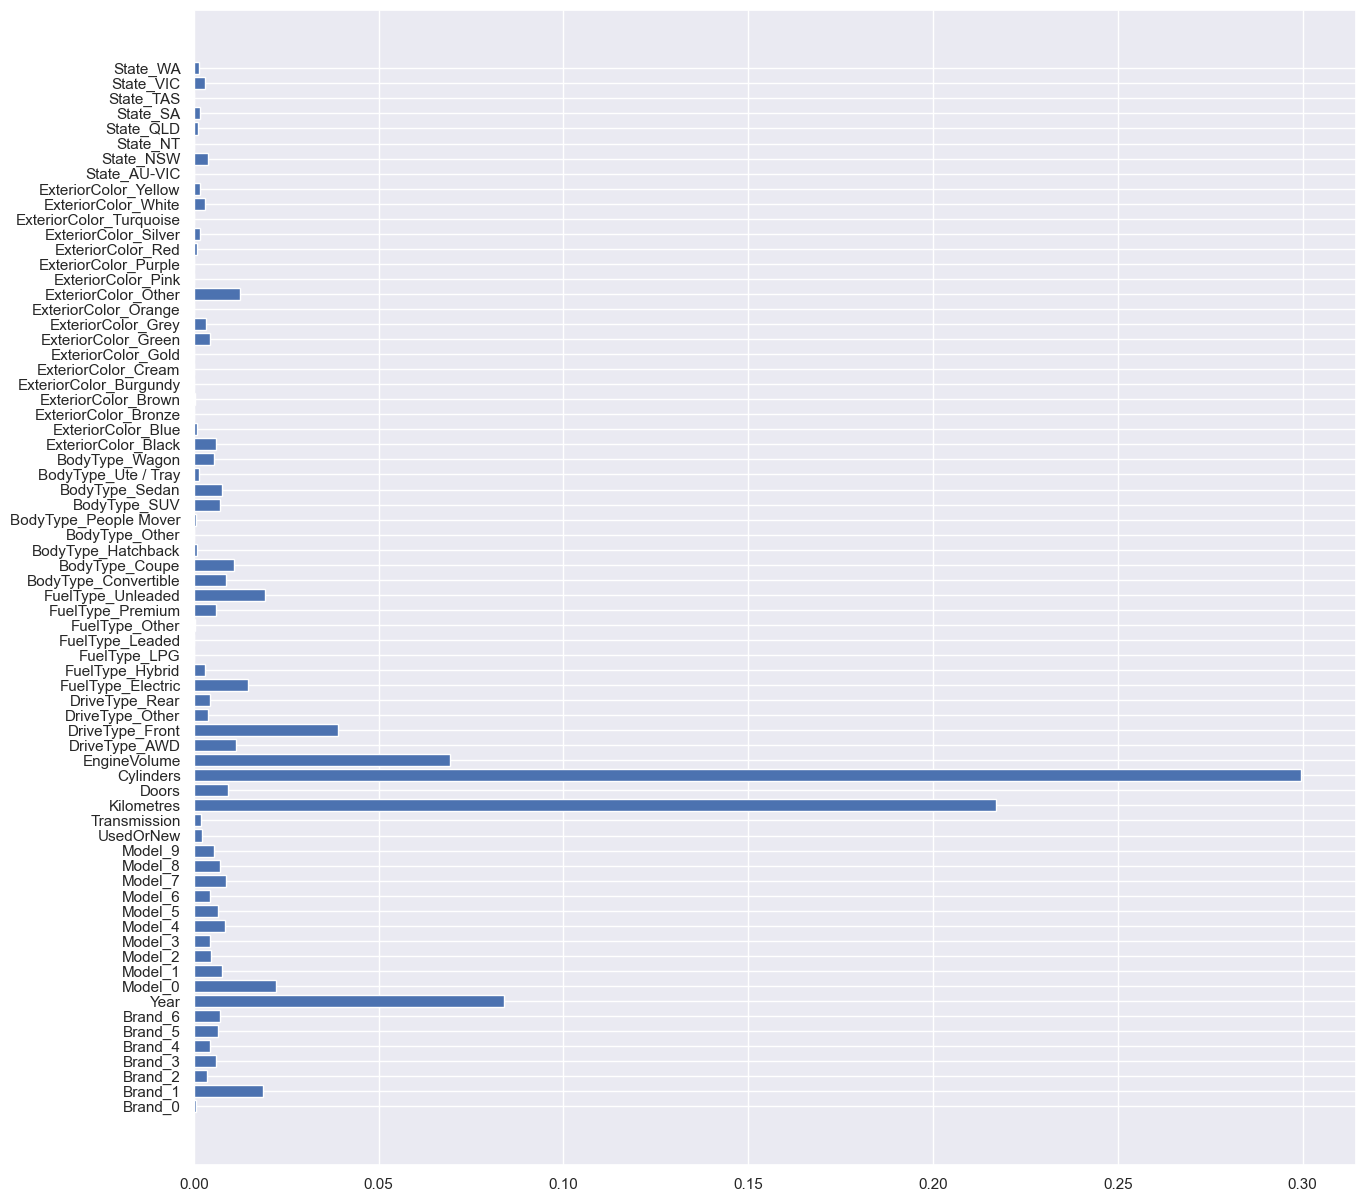

In [ ]:
# лучшая модель RandomForestRegressor, проведем ее анализ, наибольшее влияние на прогнозы модели оказывают цилиндры, киллометры и год машины
feature_importances = rfc.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(15,15))
plt.barh(feature_names, feature_importances)
plt.show()

In [ ]:
# пояснение для предсказания
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['MEDV'], verbose=True, mode='regression')
i = 5  # пример 
exp = explainer.explain_instance(X_test.iloc[i].values, rfc.predict, num_features=6)

exp.show_in_notebook(show_table=True)
exp.as_list()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


Intercept 77486.01425602121
Prediction_local [31290.49126969]
Right: 27744.07


[('Cylinders <= -0.43', -25363.11448508905),
 ('FuelType_Electric <= 0.00', -21970.454758699547),
 ('-0.19 < Kilometres <= 0.60', -9405.05072494418),
 ('DriveType_Front <= 0.00', 7418.196159206717),
 ('FuelType_Unleaded <= 0.00', 6169.918808719092),
 ('-0.63 < Year <= 0.15', -3045.0179855233223)]

Прогнозируемая цена для этого автомобиля 27744.07
Переменные FuelType_Unleaded  и DriveType_Front  оказывают положительное влияние, то есть увеличивают стоимость машины, в то время как Cylinders , Kilometres , Year  и DriveType_AWD уменьшают стоимость машины

In [ ]:
result = pd.read_csv('simple_submision2.csv')
result['Price'] = rfc.predict(test_set)

In [ ]:
result.to_csv('result.csv', index = False)